<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/chap05_03_sigmoid_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Sigmoid Differential

In [ ]:
def sigmoid(x):
  return 1 / (1 +np.exp(-x))

class sigmoid :
  def __init__(self):
    self.out=None

  def forward(self,x):
    out = simoid(x)
    self.out = out
    return out
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

Sigmoid를 활용할때! 주의점 - Vanishing Gradient!

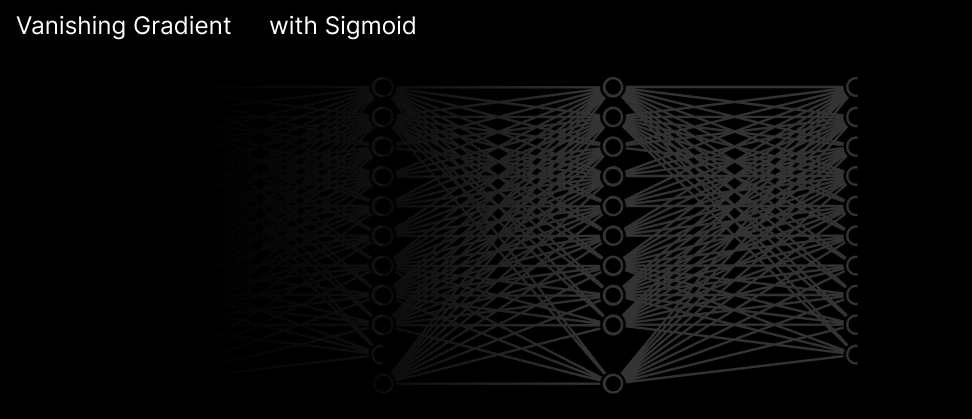

| 구간      | 출력값   | 도함수 (기울기)            |
| ------- | ----- | -------------------- |
| `x ≪ 0` | ≈ 0   | 매우 작음 (≈ 0.00001)    |
| `x ≫ 0` | ≈ 1   | 매우 작음 (≈ 0.00001)    |
| `x ≈ 0` | ≈ 0.5 | 최대 0.25 (딱 이 때만 좀 큼) |


역전파시, 도함수를 계속 곱하면 Gradient가 소멸된다!

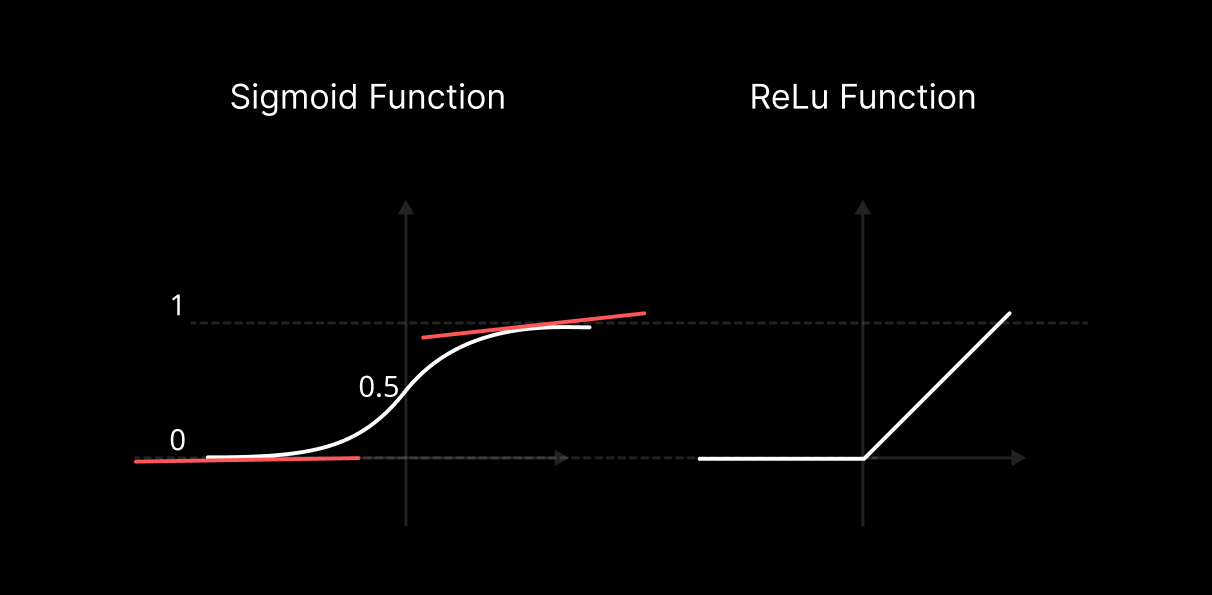

그래서! Relu를 많이 쓴다!

❌ Vanishing Gradient 문제 ❌

𝑥 → - ∞

Relu, Sigmoid 둘다 음수인 부분에는 크게 문제는 없지만,

𝑥 → ∞
Sigmoid는 x가 무한대로 가더라도 0으로 거의 사라지기 때문에,
DL Learning이 안된다!

이런 작은 기울기들이 연쇄적으로 곱해지면
→ 깊은 네트워크에서는 gradient가 소멸
→ 학습이 안 됨 😱



#### ReLu Function

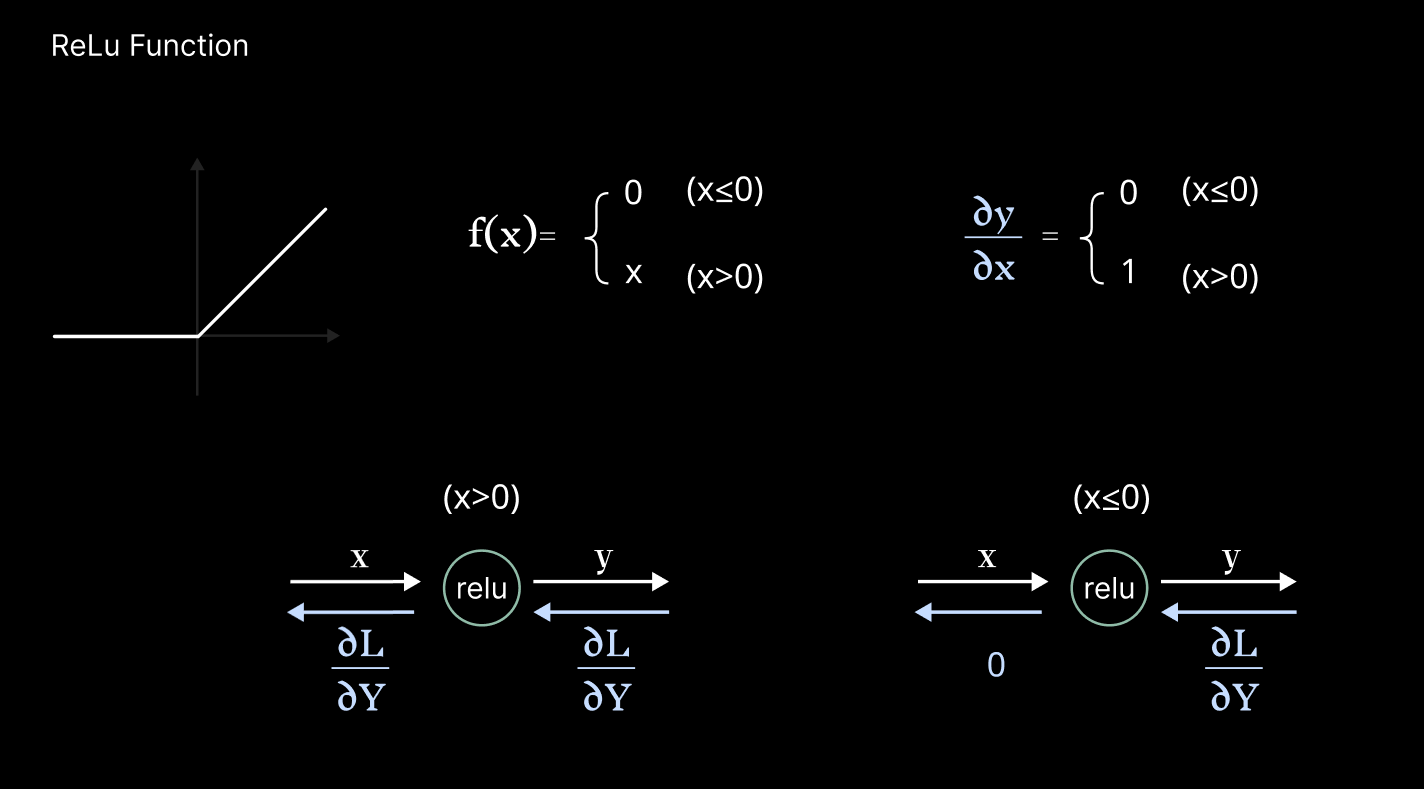

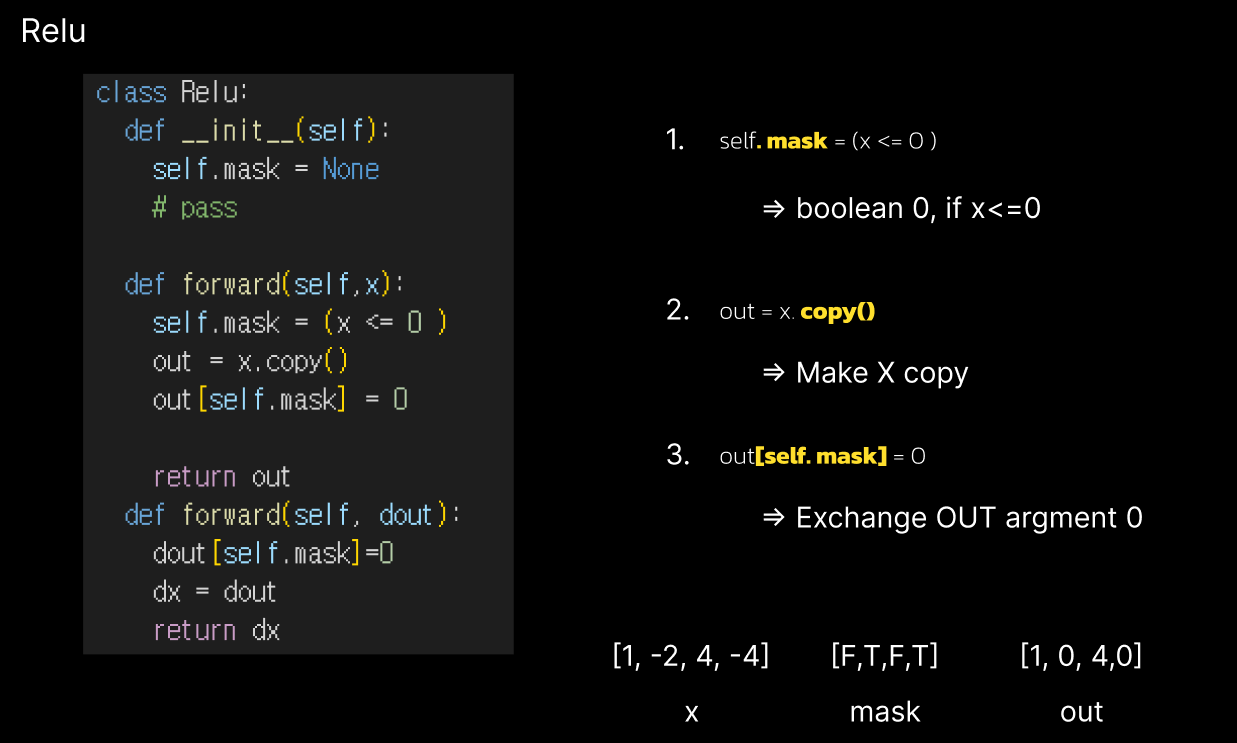

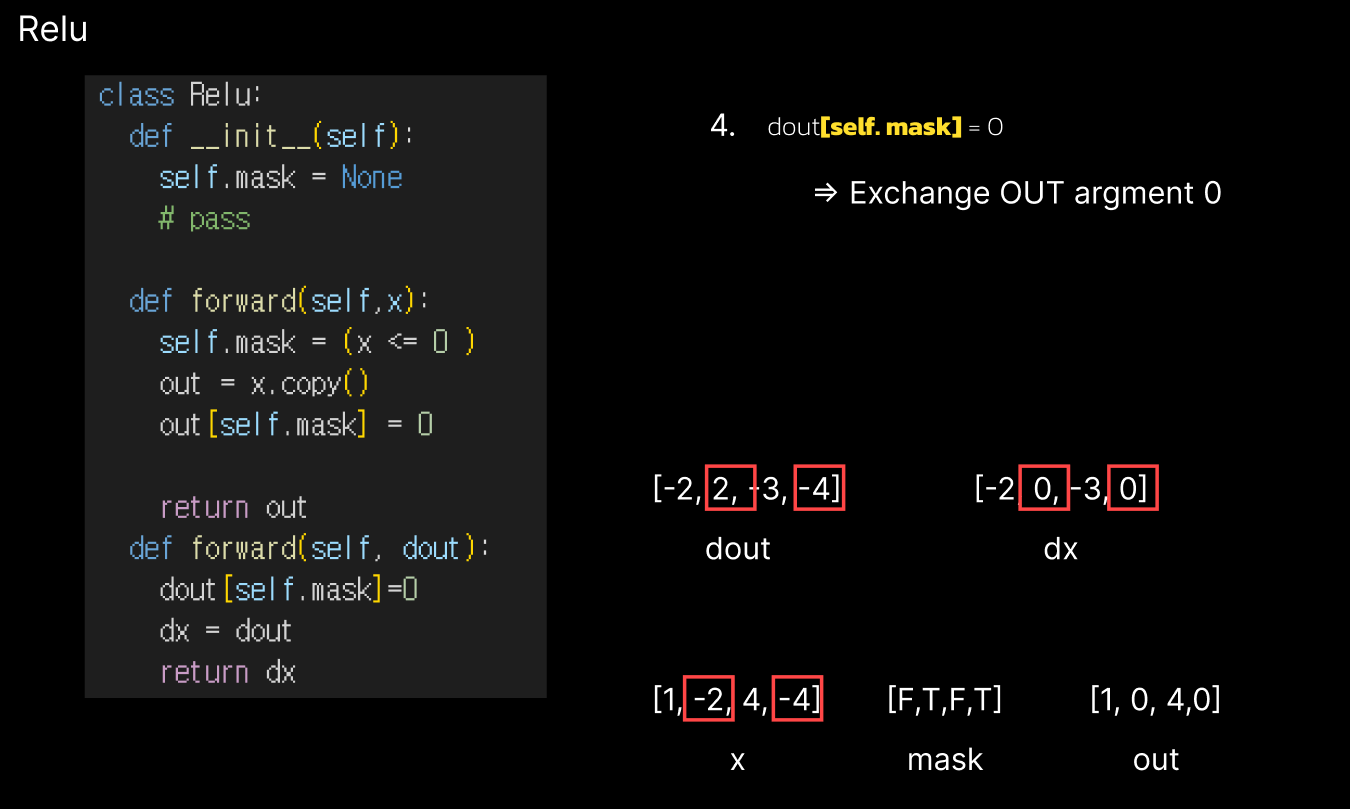

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None
    # pass

  def forward(self,x):
    self.mask = (x <= 0 )
    out = x.copy()
    out[self.mask] = 0

    return out
  def backward(self, dout):
    dout[self.mask]=0
    dx = dout
    return dx

In [ ]:
import numpy as np
BTS = Relu()
print("forward : \n", BTS.forward(np.array([1,-2,3,-4])) )
print("\n backward : \n",BTS.backward(np.array([-2, 2, -3, -4])) )

forward : 
 [1 0 3 0]

 backward : 
 [-2  0 -3  0]
